In [1]:
# load packages
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# tokenizing text
library(tidytext)

# adjust default theme
theme_set(theme_minimal())

In [3]:
# policy labels
policy_codes <- c(1:10, 12:21, 99)

In [4]:
policy_labels <- c(
"Macroeconomics", "Civil rights, minority issues, civil liberties",
"Health", "Agriculture", "Labor and employment", "Education", "Environment",
"Energy", "Immigration", "Transportation", "Law, crime, family issues",
"Social welfare", "Community development and housing issues",
"Banking, finance, and domestic commerce", "Defense",
"Space, technology, and communications", "Foreign trade",
"International affairs and foreign aid", "Government operations",
"Public lands and water management", "Other, miscellaneous"
)

In [5]:
# import data
data <- file.path("~","manning/data/csv","legislation.csv") %>%
read_csv(show_col_types = FALSE) 

In [6]:
# Looking at the columns
spec(data)

cols(
  id = col_double(),
  year = col_double(),
  cong = col_double(),
  bill_type = col_character(),
  bill_no = col_double(),
  description = col_character(),
  policy = col_double()
)

In [7]:
# text labels for policy topic
processed_data <- data %>%
mutate(policy_labels = factor(x = policy,
levels = policy_codes,
labels = policy_labels))

In [8]:
glimpse(processed_data)

Rows: 466,449
Columns: 8
$ id            <dbl> 38183, 38184, 38185, 38186, 38187, 38188, 38189, 38190, …
$ year          <dbl> 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 1947, 19…
$ cong          <dbl> 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, …
$ bill_type     <chr> "HR", "HR", "HR", "HR", "HR", "HR", "HR", "HR", "HR", "H…
$ bill_no       <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ description   <chr> "To reduce individual income tax payments", "To amend th…
$ policy        <dbl> 1, 16, 16, 12, 16, 16, 2, 5, 21, 21, 16, 5, 10, 16, 1, 1…
$ policy_labels <fct> "Macroeconomics", "Defense", "Defense", "Law, crime, fam…


### No. of bills by year

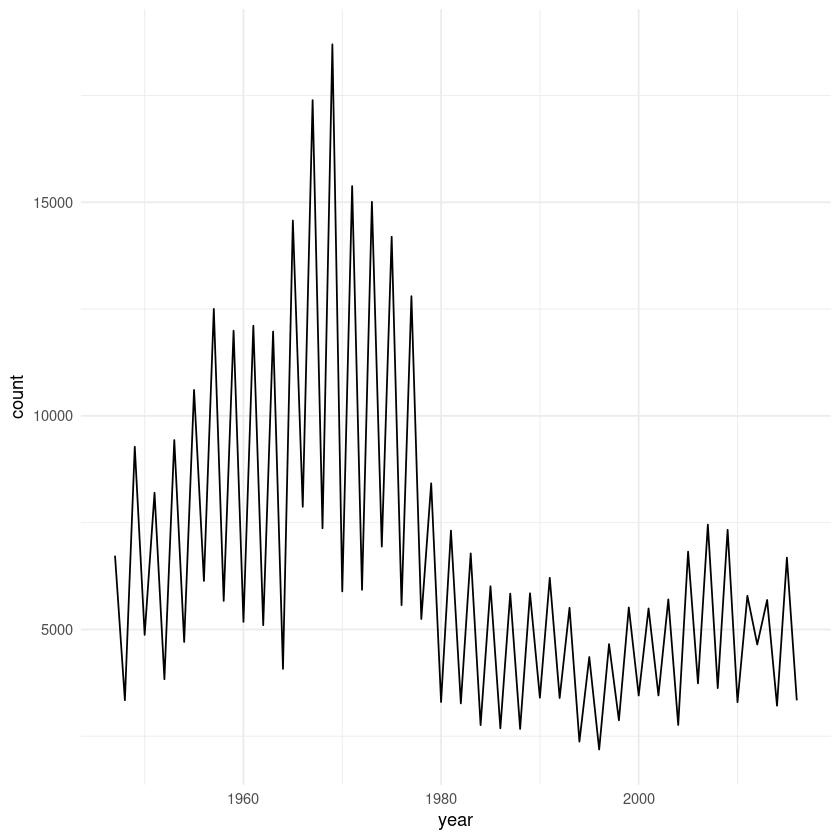

In [13]:
ggplot(processed_data,aes(x=year)) + geom_line(stat = "count")